#### 打卡汇总

| 任务名称                          | 难度 | 所需技能 |
| --------------------------------- | ---- | -------- |
| PyTorch张量计算与Numpy的转换      | 低   | PyTorch  |
| 梯度计算和梯度下降过程            | 低   | PyTorch  |
| PyTorch全连接层原理和使用         | 中   | PyTorch  |
| PyTorch激活函数原理和使用         | 低   | PyTorch  |
| PyTorch卷积层原理和使用           | 中   | PyTorch  |
| PyTorch常见的损失函数和优化器使用 | 中   | PyTorch  |
| PyTorch池化层和归一化层           | 中   | PyTorch  |
| 使用PyTorch搭建VGG网络            | 高   | PyTorch  |
| 使用PyTorch搭建ResNet网络         | 高   | PyTorch  |
| 使用PyTorch完成Fashion-MNIST分类  | 高   | PyTorch  |
| 使用PyTorch完成人脸关键点检测     | 高   | PyTorch  |
| 使用PyTorch搭建对抗生成网络       | 高   | PyTorch  |

#### 任务1：PyTorch张量计算与Numpy的转换

任务要点：Pytorch基础使用、张量计算

- 步骤1：配置本地Notebook环境

- 步骤2：学习Pytorch的基础语法，并成功执行以下代码

In [1]:
import numpy as np
import torch

c = np.ones((3, 3))
d = torch.from_numpy(c)

In [2]:
print(d)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


**任务2：梯度计算和梯度下降过程**

任务要点：Pytorch梯度计算、随机梯度下降

- 步骤1：学习自动求梯度原理，https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html

- 步骤2：学习随机梯度下降原理，https://www.cnblogs.com/BYRans/p/4700202.html

- 步骤3：

    - 使用numpy创建一个 [y=10*x+b+noise(0,1)](#)的数据，其中x是0到100的范围，以0.01进行等差数列
    - 使用pytroch定义w和b，并使用随机梯度下降，完成回归拟合。

In [138]:
import random

true_w, true_b = 10, 2
noise = np.random.normal(size=(10000,))
x = np.linspace(0, 100, 10000)
y = true_w * x + true_b + noise

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

lr = 1e-3
epochs = 100
N = 10000

for epoch in range(epochs):
    for i in range(1000):
        xi, yi = x[i], y[i]
        yi_hat = w * xi + b
        loss = 0.5 * (yi_hat - yi) ** 2
        loss.backward()
        with torch.no_grad():
            w -= lr * w.grad
            b -= lr * b.grad
        w.grad.data.zero_()
        b.grad.data.zero_()

In [139]:
print(w)
print(b)

tensor([9.9528], requires_grad=True)
tensor([2.0815], requires_grad=True)


**任务3：PyTorch全连接层原理和使用**

任务要点：全连接网络

- 步骤1：学习全连接网络原理，https://blog.csdn.net/xiaodong_11/article/details/82015456

- 步骤2：在pytorch中使用矩阵乘法实现全连接层

- 步骤3：在pytorch中使用nn.Linear层



In [165]:
from torch import nn

class MyLinear_1(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyLinear_1, self).__init__()
        self.w = torch.randn(input_dim, output_dim, requires_grad=True)
        self.b = torch.randn(output_dim, requires_grad=True)
    def forward(self, x):
        return x @ self.w + self.b

In [166]:
model = MyLinear_1(100, 10)
x = torch.randn(5, 100)
y = model(x)
print(y.shape)

torch.Size([5, 10])


In [163]:
from torch import nn

class MyLinear_2(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyLinear_2, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.linear(x)

In [164]:
model = MyLinear_2(100, 10)
x = torch.randn(5, 100)
y = model(x)
print(y.shape)

torch.Size([5, 10])




**任务4：PyTorch激活函数原理和使用**

任务要点：激活函数

- 步骤1：学习激活函数的原理，https://zhuanlan.zhihu.com/p/88429934

- 步骤2：在pytorch中手动实现上述激活函数

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
# torch.nn.ELU

def elu(x, alpha=1.0):
    return max(0, x) + min(0, alpha * (np.exp(x) - 1))

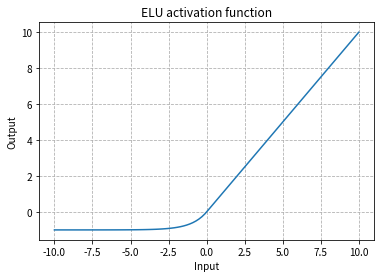

In [176]:
x = np.linspace(-10, 10, 100)
y = [elu(xi) for xi in x]
plt.plot(x, y)
plt.title('ELU activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [184]:
# torch.nn.LeakyReLU

def leaky_relu(x, negative_slope=0.01):
    return max(0, x) + negative_slope * min(0, x)

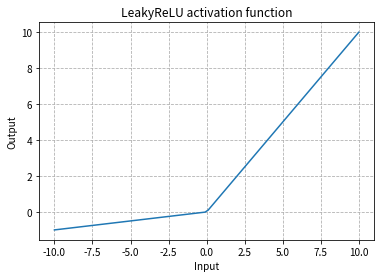

In [183]:
x = np.linspace(-10, 10, 100)
y = [leaky_relu(xi, negative_slope=0.1) for xi in x]
plt.plot(x, y)
plt.title('LeakyReLU activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [185]:
# torch.nn.ReLU

def relu(x):
    return max(0, x)

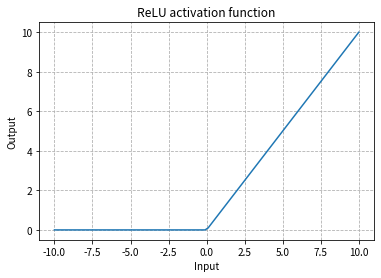

In [188]:
x = np.linspace(-10, 10, 100)
y = [relu(xi) for xi in x]
plt.plot(x, y)
plt.title('ReLU activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [193]:
# torch.nn.Sigmoid

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

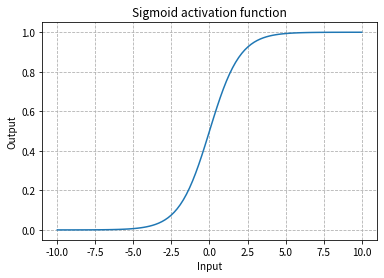

In [194]:
x = np.linspace(-10, 10, 100)
y = [sigmoid(xi) for xi in x]
plt.plot(x, y)
plt.title('Sigmoid activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [195]:
# torch.nn.LogSigmoid

def log_sigmoid(x):
    return np.log(sigmoid(x))

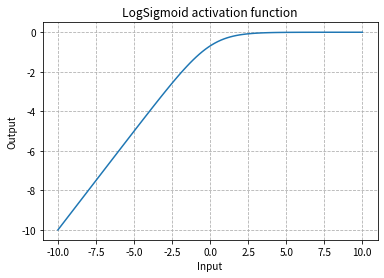

In [196]:
x = np.linspace(-10, 10, 100)
y = [log_sigmoid(xi) for xi in x]
plt.plot(x, y)
plt.title('LogSigmoid activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [197]:
# torch.nn.Tanh

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

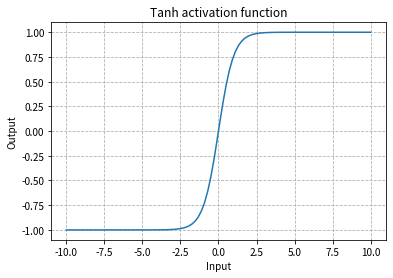

In [198]:
x = np.linspace(-10, 10, 100)
y = [tanh(xi) for xi in x]
plt.plot(x, y)
plt.title('Tanh activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()

In [199]:
# torch.nn.Tanhshrink

def tanhshrink(x):
    return x - tanh(x)

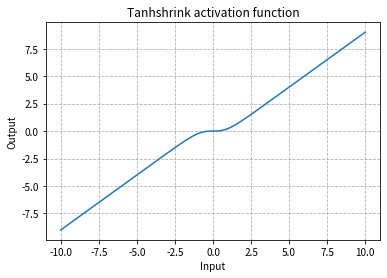

In [200]:
x = np.linspace(-10, 10, 100)
y = [tanhshrink(xi) for xi in x]
plt.plot(x, y)
plt.title('Tanhshrink activation function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(linestyle='--')
plt.show()



**任务5：PyTorch卷积层原理和使用**

任务要点：卷积层

- 步骤1：理解卷积层的原理和具体使用

- https://blog.csdn.net/qq_37385726/article/details/81739179

- https://www.cnblogs.com/zhangxiann/p/13584415.html

- 步骤2：计算下如下卷积层的参数量
```python
nn.Conv2d(
      in_channels=1,
      out_channels=32,
      kernel_size=5,    
      stride=1, 
      padding=2)
```

参数数量：in_channels * out_channels * kernel_size * kernel_size = 800

**任务6：PyTorch常见的损失函数和优化器使用**

任务要点：损失函数、优化器

- 步骤1：学习损失函数的细节，https://www.cnblogs.com/wanghui-garcia/p/10862733.html
- 步骤2：学习优化器的使用，https://pytorch.org/docs/stable/optim.html
- 步骤3：设置不同的优化器和学习率，重复任务2的回归过程
  - 损失函数MSE、优化器SGD、学习率0.1
  - 损失函数MSE、优化器SGD、学习率0.5
  - 损失函数MSE、优化器SGD、学习率0.01

In [41]:
import torch
from torch import nn
import numpy as np
import random

true_w, true_b = 10, 2
noise = np.random.normal(size=(10000,))
x = np.linspace(0, 100, 10000)
y = true_w * x + true_b + noise

model = nn.Linear(1, 1)
loss_fn = nn.MSELoss()
optimizer_1 = torch.optim.SGD(model.parameters(), lr=0.1)
optimizer_2 = torch.optim.SGD(model.parameters(), lr=0.01)
optimizer_3 = torch.optim.SGD(model.parameters(), lr=0.001)

In [42]:
def train(model, x, y, optimizer, epochs):
    nn.init.xavier_uniform_(model.weight)
    nn.init.zeros_(model.bias)
    total_loss = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        inputs = torch.from_numpy(x).view(-1, 1).float()
        outputs = torch.from_numpy(y).view(-1, 1).float()
        predicts = model(inputs)
        loss = loss_fn(predicts, outputs)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=10, norm_type=2)
        optimizer.step()
        total_loss.append(loss.item())
    return total_loss

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_xy(model, x, y):
    with torch.no_grad():
        y_pred = model(torch.from_numpy(x).view(-1, 1).float()).detach().numpy()
    plt.plot(x, y_pred, label='true')
    plt.plot(x, y, 'ro', label='predict')
    plt.title('Linear Regression')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
def plot_loss(loss):
    i = range(len(loss))
    plt.plot(i, loss)
    plt.title('loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

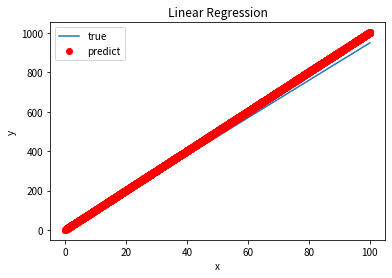

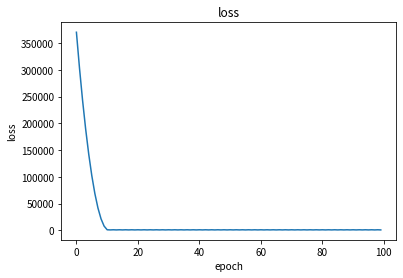

In [51]:
loss_1 = train(model, x, y, optimizer_1, epochs=100)
plot_xy(model, x, y)
plot_loss(loss_1)

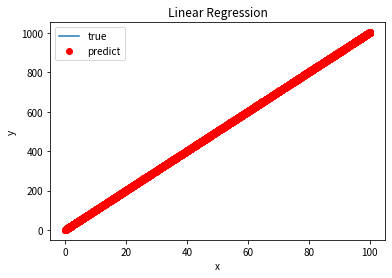

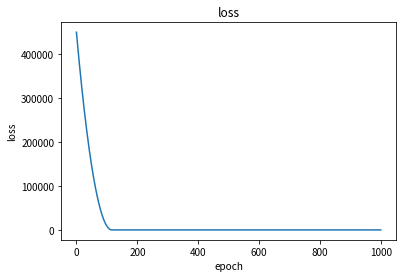

In [52]:
loss_2 = train(model, x, y, optimizer_2, epochs=1000)
plot_xy(model, x, y)
plot_loss(loss_2)

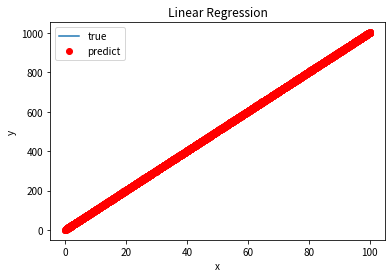

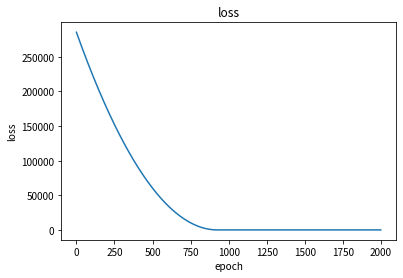

In [53]:
loss_3 = train(model, x, y, optimizer_3, epochs=2000)
plot_xy(model, x, y)
plot_loss(loss_3)

**任务7：PyTorch池化层和归一化层**

任务要点：池化层、归一化层

- 步骤1：使用pytroch代码实现2d pool中的mean-pooling、max-pooling
  - https://pytorch.org/docs/stable/nn.html#pooling-layers

  - https://blog.csdn.net/shanglianlm/article/details/85313924

- 步骤2：学习归一化的原理，https://blog.csdn.net/qq_23981335/article/details/106572171

In [346]:
import torch

def pool2d(inputs, kernel_size, stride=None, padding=0, mode='mean'):
    height, width = inputs.shape
    if isinstance(kernel_size, int):
        kernel_height = kernel_width = kernel_size
    else:
        kernel_height, kernel_width = kernel_size
    if stride is None:
        stride_height, stride_width = kernel_height, kernel_width
    elif isinstance(stride, int):
        stride_height = stride_width = stride
    else:
        stride_height, stride_width = stride
    if isinstance(padding, int):
        padding_height = padding_width = padding
    else:
        padding_height, padding_width = padding
    
    outputs_height = (height + 2 * padding_height - kernel_height) // stride_height + 1
    outputs_width = (width + 2 * padding_width - kernel_width) // stride_width + 1
    
    padding_top = torch.zeros(padding_height, width)
    padding_left = torch.zeros(height + 2 * padding_height, padding_width)
    inputs = torch.cat((padding_top, inputs, padding_top), dim=0)
    inputs = torch.cat((padding_left, inputs, padding_left), dim=1)
    
    outputs = torch.zeros(outputs_height, outputs_width)
    
    for x in range(0, inputs.shape[0]-kernel_height+1, stride_height):
        for y in range(0, inputs.shape[1]-kernel_width+1, stride_width):
            inputs_part = inputs[x:x+kernel_height, y:y+kernel_width]
            i, j = x // stride_height, y // stride_width
            if mode == 'mean':
                outputs[i, j] = torch.mean(inputs_part)
            elif mode == 'max':
                outputs[i, j] = torch.max(inputs_part)
    return outputs 

In [347]:
inputs = torch.randint(1, 10, size=(6,6))
outputs = pool2d(inputs, kernel_size=3, stride=1, mode='mean')

In [348]:
inputs, outputs

(tensor([[4, 3, 3, 4, 2, 1],
         [2, 9, 3, 3, 4, 5],
         [6, 1, 6, 8, 5, 7],
         [5, 1, 4, 6, 5, 2],
         [1, 4, 1, 4, 3, 7],
         [2, 7, 8, 8, 2, 4]]),
 tensor([[4.1111, 4.4444, 4.2222, 4.3333],
         [4.1111, 4.5556, 4.8889, 5.0000],
         [3.2222, 3.8889, 4.6667, 5.2222],
         [3.6667, 4.7778, 4.5556, 4.5556]]))

In [349]:
outputs = pool2d(inputs, kernel_size=(2,3), stride=(1,2), padding=1, mode='mean')

In [350]:
inputs, outputs

(tensor([[4, 3, 3, 4, 2, 1],
         [2, 9, 3, 3, 4, 5],
         [6, 1, 6, 8, 5, 7],
         [5, 1, 4, 6, 5, 2],
         [1, 4, 1, 4, 3, 7],
         [2, 7, 8, 8, 2, 4]]),
 tensor([[1.1667, 1.6667, 1.1667],
         [3.0000, 4.1667, 3.1667],
         [3.0000, 5.0000, 5.3333],
         [2.1667, 4.3333, 5.5000],
         [1.8333, 3.3333, 4.5000],
         [2.3333, 5.3333, 4.6667],
         [1.5000, 3.8333, 2.3333]]))

**任务8：使用PyTorch搭建VGG网络**

任务要点：网络搭建

https://zhuanlan.zhihu.com/p/263527295

- 步骤1：理解VGG网络的原理。

- 步骤2：使用pytorch搭建VGG网络模型。

- 步骤3：打印出VGG 11层模型 每层特征图的尺寸，以及参数量。

In [4]:
import torch 
from torch import nn

In [12]:
class VGG(nn.Module):
    def __init__(self, arch, num_classes):
        super(VGG, self).__init__()
        self.in_channels = 3
        self.conv3_64 = self.make_layers(64, arch[0])
        self.conv3_128 = self.make_layers(128, arch[1])
        self.conv3_256 = self.make_layers(256, arch[2])
        self.conv3_512_1 = self.make_layers(512, arch[3])
        self.conv3_512_2 = self.make_layers(512, arch[4])
        self.linear1 = nn.Linear(7*7*512, 4096)
        self.bn1 = nn.BatchNorm1d(4096)
        self.linear2 = nn.Linear(4096, 4096)
        self.bn2 = nn.BatchNorm1d(4096)
        self.linear3 = nn.Linear(4096, num_classes)
        self.relu = nn.ReLU()
    
    def make_layers(self, out_channels, nums):
        layers = []
        for i in range(nums):
            layers.append(nn.Conv2d(self.in_channels, out_channels, kernel_size=3, stride=1, padding=1))
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.ReLU())
            self.in_channels = out_channels
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        print(x.shape)
        x = self.conv3_64(x)
        print(x.shape)
        x = self.conv3_128(x)
        print(x.shape)
        x = self.conv3_256(x)
        print(x.shape)
        x = self.conv3_512_1(x)
        print(x.shape)
        x = self.conv3_512_2(x)
        print(x.shape)
        x = self.relu(self.bn1(self.linear1(x.view(x.size(0), -1))))
        x = self.relu(self.bn2(self.linear2(x)))
        out = self.linear3(x)
        return out
        
            

In [13]:
vgg11 = VGG(arch=[1,1,2,2,2], num_classes=1000)

In [14]:
from torchsummary import summary
summary(vgg11, input_size=(3, 224, 224))

torch.Size([2, 3, 224, 224])
torch.Size([2, 64, 112, 112])
torch.Size([2, 128, 56, 56])
torch.Size([2, 256, 28, 28])
torch.Size([2, 512, 14, 14])
torch.Size([2, 512, 7, 7])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
         MaxPool2d-4         [-1, 64, 112, 112]               0
            Conv2d-5        [-1, 128, 112, 112]          73,856
       BatchNorm2d-6        [-1, 128, 112, 112]             256
              ReLU-7        [-1, 128, 112, 112]               0
         MaxPool2d-8          [-1, 128, 56, 56]               0
            Conv2d-9          [-1, 256, 56, 56]         295,168
      BatchNorm2d-10          [-1, 256, 56, 56]             512
             ReLU-11          [-1, 256, 56, 56]           

In [48]:
class Layer(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding):
        super(Layer, self).__init__()
        layers = []
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding))
        layers.append(nn.BatchNorm2d(out_channels))
        layers.append(nn.ReLU())
        self.layer = nn.Sequential(*layers)
    def forward(self, x):
        return self.layer(x)
    
class ResBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride):
        super(ResBlock, self).__init__()
        layers = []
        layers.append(Layer(in_channels, out_channels, kernel_size=3, stride=stride, padding=1))
        layers.append(Layer(out_channels, out_channels, kernel_size=3, stride=1, padding=1))
        self.short_cut = nn.Sequential()
        if stride != 1:
            self.short_cut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 1, stride=stride, padding=0),
                nn.BatchNorm2d(out_channels))
        self.block = nn.Sequential(*layers)
        self.relu = nn.ReLU()
                
    def forward(self, x):
        out = self.short_cut(x) + self.block(x)
        return self.relu(out)
    
class ResNet(nn.Module):
    def __init__(self, arch, num_classes):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.conv2 = self.make_layers(64, 64, arch[0])
        self.conv3 = self.make_layers(64, 128, arch[1])
        self.conv4 = self.make_layers(128, 256, arch[2])
        self.conv5 = self.make_layers(256, 512, arch[3])
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.linear = nn.Linear(512, num_classes)
    
    def make_layers(self, in_channels, out_channels, nums):
        layers = []
        for i in range(nums):
            if i == 0:
                layers.append(ResBlock(in_channels, out_channels, stride=2))
            else:
                layers.append(ResBlock(out_channels, out_channels, stride=1))
        return nn.Sequential(*layers)

    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.pool(x)
        out = self.linear(x.view(x.size(0), -1))
        return out
            

In [49]:
resnet18 = ResNet(arch=[2, 2, 2, 2], num_classes=1000)

In [50]:
from torchsummary import summary
summary(resnet18, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,472
            Conv2d-2           [-1, 64, 56, 56]           4,160
       BatchNorm2d-3           [-1, 64, 56, 56]             128
            Conv2d-4           [-1, 64, 56, 56]          36,928
       BatchNorm2d-5           [-1, 64, 56, 56]             128
              ReLU-6           [-1, 64, 56, 56]               0
             Layer-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,928
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
            Layer-11           [-1, 64, 56, 56]               0
             ReLU-12           [-1, 64, 56, 56]               0
         ResBlock-13           [-1, 64, 56, 56]               0
           Conv2d-14           [-1, 64,

**任务10：使用PyTorch完成Fashion-MNIST分类**

https://github.com/masoudrostami/Fashion-MNIST-using-PyTorch/blob/main/MNIST Fashion Project.ipynb

- 步骤1：搭建4层卷积 + 2层全连接的分类模型。

- 步骤2：在训练过程中记录下每个epoch的训练集精度和测试集精度。

In [1]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [5]:
# load data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((.5,), (.5,))
])

trainset = datasets.FashionMNIST('~/.pytorch/', download=False, train=True, transform=transform)
testset = datasets.FashionMNIST('~/.pytorch/', download=False, train=False, transform=transform)
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = DataLoader(testset, batch_size=64)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
for x, y in train_loader:
    print(x.shape)
    print(len(y))
    print([labels[yi] for yi in y])
    break

torch.Size([64, 1, 28, 28])
64
['Pullover', 'Dress', 'Ankle Boot', 'Pullover', 'Sandal', 'Dress', 'Coat', 'Coat', 'Sandal', 'Bag', 'Shirt', 'Sneaker', 'Shirt', 'Pullover', 'Trouser', 'Sneaker', 'Trouser', 'T-shirt/top', 'Bag', 'Sneaker', 'Dress', 'Shirt', 'Bag', 'Ankle Boot', 'Ankle Boot', 'Shirt', 'Bag', 'Dress', 'Sandal', 'Pullover', 'Trouser', 'Trouser', 'Dress', 'Shirt', 'T-shirt/top', 'Coat', 'Pullover', 'Ankle Boot', 'Trouser', 'Trouser', 'Dress', 'Shirt', 'Sneaker', 'Sneaker', 'Sneaker', 'Bag', 'Pullover', 'Trouser', 'Sandal', 'Bag', 'Dress', 'Shirt', 'Pullover', 'Pullover', 'Coat', 'Sneaker', 'Sneaker', 'Sandal', 'T-shirt/top', 'Coat', 'Pullover', 'T-shirt/top', 'Bag', 'Sandal']


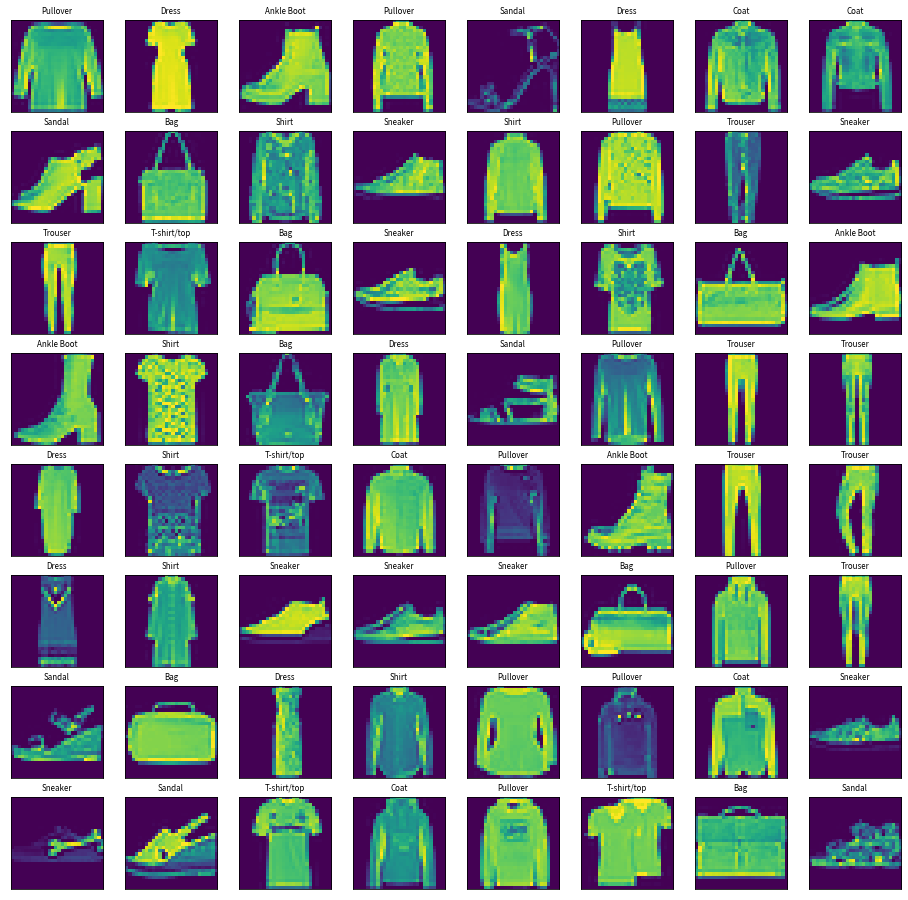

In [35]:
fig, axes = plt.subplots(8, 8, figsize=(16,16))
for i in range(8):
    for j in range(8):
        ax = axes[i, j]
        ax.imshow(x[i*8+j].squeeze())
        ax.set_title(labels[y[i*8+j]], fontsize=8)
        ax.set_xticks([])
        ax.set_yticks([])
plt.show()

In [36]:
# define Model
class Net(nn.Module):
    def __init__(self, in_channels=3, num_classes=10):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=2, padding=1) #[1, 28, 28] -> [3, 14, 14]
        self.conv2 = nn.Conv2d(4, 16, kernel_size=3, stride=2, padding=1) #[3, 14, 14] -> [16, 7, 7]
        self.conv3 = nn.Conv2d(16, 64, kernel_size=3, stride=2, padding=0) #[16, 7, 7] -> [64, 3, 3]
        self.conv4 = nn.Conv2d(64, 256, kernel_size=3) #[64, 3, 3] -> [256, 1, 1]
        self.relu = nn.ReLU()
        self.linear1 = nn.Linear(256, 64)
        self.linear2 = nn.Linear(64, num_classes)
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.relu(self.linear1(x.view(x.size(0), -1)))
        x = self.relu(self.linear2(x))
        return x

In [38]:
from torchsummary import summary
model = Net()
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 14, 14]              40
              ReLU-2            [-1, 4, 14, 14]               0
            Conv2d-3             [-1, 16, 7, 7]             592
              ReLU-4             [-1, 16, 7, 7]               0
            Conv2d-5             [-1, 64, 3, 3]           9,280
              ReLU-6             [-1, 64, 3, 3]               0
            Conv2d-7            [-1, 256, 1, 1]         147,712
              ReLU-8            [-1, 256, 1, 1]               0
            Linear-9                   [-1, 64]          16,448
             ReLU-10                   [-1, 64]               0
           Linear-11                   [-1, 10]             650
             ReLU-12                   [-1, 10]               0
Total params: 174,722
Trainable params: 174,722
Non-trainable params: 0
-------------------------------

In [55]:
from datetime import datetime

def printbar():
    now = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print('========'*8 + now)

In [73]:
# training the model
import pandas as pd

def train(model, train_data, valid_data, loss_fn, optimizer, epochs, batch_size=64):
    model.train()
    columns = ['step', 'train_loss', 'valid_loss', 'train_acc', 'valid_acc']
    dfhistory = []
    for epoch in range(epochs):
        train_loss = 0
        train_accuracy = 0
        for i, (x, y) in enumerate(train_data):
            optimizer.zero_grad()
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_accuracy += sum(y_pred.argmax(dim=1) == y)
        model.eval()
        valid_loss = 0
        valid_accuracy = 0
        for i, (x, y) in enumerate(valid_data):
            with torch.no_grad():
                y_pred = model(x)
                loss = loss_fn(y_pred, y)
                valid_loss += loss.item()
                valid_accuracy += sum(y_pred.argmax(dim=1) == y).numpy()
        history = [epoch+1, train_loss/len(train_data), valid_loss/len(valid_data), train_accuracy/len(train_data)/batch_size, valid_accuracy/len(valid_data)/batch_size]
        dfhistory.append(history)
        printbar()
        print('epoch {}, train loss: {:.4f}, valid loss: {:.4f}, train accuracy: {:.4f}, valid accuracy: {:.4f}\n'.format(*history))
    return pd.DataFrame(dfhistory, columns=columns)

In [74]:
# define params
model = Net()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 20
dfhistory = train(model, train_loader, test_loader, loss_fn, optimizer, epochs)

================================================================2021-11-15 00:44:01
epoch 1, train loss: 0.7365, valid loss: 0.6247, train accuracy: 0.7459, valid accuracy: 0.7803

================================================================2021-11-15 00:44:14
epoch 2, train loss: 0.5903, valid loss: 0.6073, train accuracy: 0.7949, valid accuracy: 0.7959

================================================================2021-11-15 00:44:28
epoch 3, train loss: 0.5694, valid loss: 0.5789, train accuracy: 0.8013, valid accuracy: 0.7976

================================================================2021-11-15 00:44:42
epoch 4, train loss: 0.5546, valid loss: 0.6025, train accuracy: 0.8061, valid accuracy: 0.7910

================================================================2021-11-15 00:44:57
epoch 5, train loss: 0.5527, valid loss: 0.5877, train accuracy: 0.8088, valid accuracy: 0.7953

================================================================2021-11-15 00:45:12
epoch 6, tr

**任务11：使用PyTorch完成人脸关键点检测**

数据集：[https://ai-contest-static.xfyun.cn/2021/7afa865e-5ac8-48ab-9966-d88bb33cdc15/%E4%BA%BA%E8%84%B8%E5%85%B3%E9%94%AE%E7%82%B9%E6%A3%80%E6%B5%8B%E6%8C%91%E6%88%98%E8%B5%9B_%E6%95%B0%E6%8D%AE%E9%9B%86.zip](https://ai-contest-static.xfyun.cn/2021/7afa865e-5ac8-48ab-9966-d88bb33cdc15/人脸关键点检测挑战赛_数据集.zip)

[https://gitee.com/coggle/competition-baseline/blob/master/competition/%E7%A7%91%E5%A4%A7%E8%AE%AF%E9%A3%9EAI%E5%BC%80%E5%8F%91%E8%80%85%E5%A4%A7%E8%B5%9B2021/%E4%BA%BA%E8%84%B8%E5%85%B3%E9%94%AE%E7%82%B9%E6%A3%80%E6%B5%8B%E6%8C%91%E6%88%98%E8%B5%9B/face-keypoint2.ipynb](https://gitee.com/coggle/competition-baseline/blob/master/competition/科大讯飞AI开发者大赛2021/人脸关键点检测挑战赛/face-keypoint2.ipynb)

- 步骤1：搭建4层卷积 + 2层的模型完成关键点回归。

- 步骤2：使用resnet18预训练模型完成关键点回归。